<b>План работы</b>
<br>Условие
<br>Проведите исследовательский анализ данных. В конце Jupyter Notebook напишите:
<br>Список уточняющих вопросов.
<br>Примерный план решения задачи. Пропишите 3–5 основных шагов, каждый поясните не более двумя предложениями.
<br>Цель проекта.

<br><b>Описание проекта: телекоммуникации</b>
<br>Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

<br><b>Описание услуг</b>
<br>Оператор предоставляет два основных типа услуг: 
<br>Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).
<br>Также доступны такие услуги:
<br>Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
<br>Выделенная линия технической поддержки (TechSupport);
<br>Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
<br>Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).
<br>За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

<br><b>Описание данных</b>
<br>Данные состоят из файлов, полученных из разных источников:
<br>contract_new.csv — информация о договоре;
<br>personal_new.csv — персональные данные клиента;
<br>internet_new.csv — информация об интернет-услугах;
<br>phone_new.csv — информация об услугах телефонии.
<br>Во всех файлах столбец customerID содержит код клиента.

<br>Информация о договорах актуальна на 1 февраля 2020.

# 1. Исследовательский анализ данных

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier


from sklearn.metrics import f1_score, confusion_matrix, recall_score, precision_score,  roc_auc_score, roc_auc_score, roc_curve, classification_report
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import ConfusionMatrixDisplay

random_state = 310723

In [2]:
#загрузка данных
contract_new = pd.read_csv('/datasets/contract_new.csv')
personal_new = pd.read_csv('/datasets/personal_new.csv')
internet_new = pd.read_csv('/datasets/internet_new.csv')
phone_new = pd.read_csv('/datasets/phone_new.csv')

In [3]:
#функция, чтобы быстро взглянуь на данные
def data_info(data):
    print(data.info())
    print('------------------------------------')
    print('------------------------------------')
    print(data.describe())
    print('------------------------------------')
    print('------------------------------------')
    print("Пропущенные значения:")
    print(data.isna().sum())
    print('------------------------------------')
    print('------------------------------------')
    print("Дубликатов:",data.duplicated().sum())
    print('------------------------------------')
    print('------------------------------------')


<b><code>contract_new</code>

In [4]:
contract_new.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [5]:
data_info(contract_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None
------------------------------------
------------------------------------
       MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000
------------------------------------
------------------------------------
Пропущенные значени

In [6]:
contract_new['BeginDate'].value_counts()

2014-02-01    366
2019-10-01    237
2019-11-01    237
2019-09-01    237
2020-01-01    233
             ... 
2020-02-01     11
2014-01-01      7
2013-10-01      3
2013-12-01      3
2013-11-01      2
Name: BeginDate, Length: 77, dtype: int64

In [7]:
contract_new['EndDate'].value_counts()

No            5942
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
              ... 
2014-09-01       2
2014-12-01       2
2014-06-01       1
2014-10-01       1
2014-11-01       1
Name: EndDate, Length: 67, dtype: int64

In [8]:
contract_new['Type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

In [9]:
contract_new['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [10]:
contract_new['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [11]:
contract_new['EndDate']= contract_new['EndDate'].replace({'No': '2020-02-01'})

In [12]:
contract_new['BeginDate'] = pd.to_datetime(contract_new['BeginDate'], format='%Y-%m-%d')
contract_new['EndDate'] = pd.to_datetime(contract_new['EndDate'], format='%Y-%m-%d')

In [13]:
#Что-то не поняла, это 11 строк с пробелами?
contract_new['TotalCharges'].value_counts()

           11
20.45       6
101.0       5
21.53       4
40.1        4
           ..
4357.5      1
3509.55     1
2530.8      1
2599.1      1
7251.82     1
Name: TotalCharges, Length: 6658, dtype: int64

In [14]:
contract_new['TotalCharges'].sort_values()

3331          
4380          
6670          
488           
3826          
         ...  
2880    997.78
3267    998.89
6023     999.6
1700     999.6
1625     999.9
Name: TotalCharges, Length: 7043, dtype: object

In [15]:
contract_new['TotalCharges'] = pd.to_numeric(contract_new['TotalCharges'], errors ='coerce')

In [16]:
contract_new['TotalCharges'].isna().sum()

11

In [17]:
contract_new['TotalCharges'] = contract_new['TotalCharges'].fillna(0)
contract_new['TotalCharges'].isna().sum()

0

<b> Вывод по contract_new </b>


В contract_new нету пропущенных значений и дубликатов. Тип данных TotalCharges, BeginDate, EndDate почему-то object, заменила на float и datetime соответственно. В EndDate есть значение "No". Между вариантами дропнуть или заменить на другое значение - выбрала заменить на "1999-01-01". В типе оплаты больше людей, которые оплачивают по-месячно. Тип платежа - Electronic check.

<b><code>personal_new</code>

In [18]:
data_info(personal_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None
------------------------------------
------------------------------------
       SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
------------------------------------
------------------------------------
Пропущенные значения:
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
------------------------------------
--------------------------------

In [19]:
personal_new['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [20]:
personal_new['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [21]:
personal_new['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [22]:
personal_new['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<b> Вывод по personal_new </b>


Пропущенных значений и дубликатов в personal_new нету. По гендеру чуть больше мужчин. Чуть больше половины не состоят в браке. Детей нет у преобладающего большинства.

<b><code>internet_new</code>

In [23]:
data_info(internet_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None
------------------------------------
------------------------------------
        customerID InternetService OnlineSecurity OnlineBackup  \
count         5517            5517           5517         5517   
unique        5517               2              2            2   
top     7590-VHVEG     Fiber optic             No           No   
freq             1            3096           3498

In [24]:
internet_new['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

In [25]:
internet_new['OnlineSecurity'].value_counts()

No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64

In [26]:
internet_new['OnlineBackup'].value_counts()

No     3088
Yes    2429
Name: OnlineBackup, dtype: int64

In [27]:
internet_new['DeviceProtection'].value_counts()

No     3095
Yes    2422
Name: DeviceProtection, dtype: int64

In [28]:
internet_new['TechSupport'].value_counts()

No     3473
Yes    2044
Name: TechSupport, dtype: int64

In [29]:
internet_new['StreamingTV'].value_counts()

No     2810
Yes    2707
Name: StreamingTV, dtype: int64

In [30]:
internet_new['StreamingMovies'].value_counts()

No     2785
Yes    2732
Name: StreamingMovies, dtype: int64

<b> Вывод по internet_new </b>

Пропущенных значений и дубликатов в internet_new нету. Тип подключения — Fiber optic. У большинства нету блокировки опасных сайтов, облачного хранилище файлов для резервного копирования данных, антивируса, выделенной линии технической поддержки. В общем, бесстрашные люди.

В датасете всего 5517 строк, что меньше, чем в предыдущих двух. Значит, тут не все клиенты.

<b><code>phone_new</code>

In [31]:
data_info(phone_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None
------------------------------------
------------------------------------
        customerID MultipleLines
count         6361          6361
unique        6361             2
top     5575-GNVDE            No
freq             1          3390
------------------------------------
------------------------------------
Пропущенные значения:
customerID       0
MultipleLines    0
dtype: int64
------------------------------------
------------------------------------
Дубликатов: 0
------------------------------------
------------------------------------


In [32]:
phone_new['MultipleLines'].value_counts()

No     3390
Yes    2971
Name: MultipleLines, dtype: int64

<b> Вывод по phone_new </b>

Пропущенных значений и дубликатов в phone_new нету. У большинства нету подключения телефона к нескольким линиям одновременно. Не все данные по клиентам.

# 2. Выводы, планы, вопросы

1. Надо собрать данные в один датасет, посмотреть на выбросы.
2. PaymentMethod, Type, PaperlessBilling, gender, Partner, Dependents, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, MultipleLines - Выглядат как кандидаты на  one hot encoding

3. Если речь идет об оттоке, то целевая переменная будет EndDate (дата окончания действия договора)?

<div class="alert alert-block alert-info">
<b>План работы:</b>
<br>1. Объединить все датасеты
<br>2. Предобработка данных
<br>3. Разделить выборки
<br>4. Моделирование (подбор гиперпараметров, выбор лучшей модели, проверка на тесте)


</div>

# 3. Объединяем датасеты

In [33]:
df_1 = contract_new.merge(personal_new, left_on='customerID', right_on='customerID')

In [34]:
df_2 = df_1.merge(internet_new, how='left', left_on='customerID', right_on='customerID')

In [35]:
final_data = df_2.merge(phone_new, how='left', left_on='customerID', right_on='customerID')

In [36]:
#создание новых признаков

In [37]:
final_data['days'] = (final_data['EndDate'] - final_data['BeginDate']).dt.days

In [38]:
final_data['count_charges'] = final_data['TotalCharges']/final_data['MonthlyCharges']

In [39]:
final_data['mean_charges'] = final_data['TotalCharges'].mean()

In [40]:
final_data['charges_per_date'] = final_data['TotalCharges']/final_data['days']

In [41]:
final_data['mean_total_charges'] = final_data['mean_charges']*final_data['days']

In [42]:
final_data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,days,count_charges,mean_charges,charges_per_date,mean_total_charges
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,No,No,No,NaN,31,1.039866,2115.312885,1.001290,6.557470e+04
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,...,Yes,No,No,No,No,1036,36.379982,2115.312885,1.999846,2.191464e+06
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,No,No,No,No,No,123,4.200000,2115.312885,1.838780,2.601835e+05
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,...,Yes,Yes,No,No,NaN,1371,46.349882,2115.312885,1.430051,2.900094e+06
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,...,No,No,No,No,No,153,5.000000,2115.312885,2.310458,3.236429e+05


In [43]:
data_info(final_data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customerID          7043 non-null   object        
 1   BeginDate           7043 non-null   datetime64[ns]
 2   EndDate             7043 non-null   datetime64[ns]
 3   Type                7043 non-null   object        
 4   PaperlessBilling    7043 non-null   object        
 5   PaymentMethod       7043 non-null   object        
 6   MonthlyCharges      7043 non-null   float64       
 7   TotalCharges        7043 non-null   float64       
 8   gender              7043 non-null   object        
 9   SeniorCitizen       7043 non-null   int64         
 10  Partner             7043 non-null   object        
 11  Dependents          7043 non-null   object        
 12  InternetService     5517 non-null   object        
 13  OnlineSecurity      5517 non-null   object      

In [44]:
#Появились пропуски, но мы их заполним

# 4. Заполнение пропусков, поиск аномалий

In [45]:
#все пропущенные значения категориальные, значит таких услуг у клиента нет, можно просто заменить на "No"

In [46]:
final_data['charges_per_date'] = final_data['charges_per_date'].fillna('0')
final_data = final_data.fillna('No')

In [47]:
final_data.isna().sum()

customerID            0
BeginDate             0
EndDate               0
Type                  0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
MultipleLines         0
days                  0
count_charges         0
mean_charges          0
charges_per_date      0
mean_total_charges    0
dtype: int64

In [48]:
final_data = final_data.set_index('customerID')

In [49]:
final_data.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,days,count_charges,mean_charges,charges_per_date,mean_total_charges
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,...,No,No,No,No,No,31,1.039866,2115.312885,1.00129,6.557470e+04
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,No,...,Yes,No,No,No,No,1036,36.379982,2115.312885,1.999846,2.191464e+06
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,...,No,No,No,No,No,123,4.200000,2115.312885,1.83878,2.601835e+05
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,...,Yes,Yes,No,No,No,1371,46.349882,2115.312885,1.430051,2.900094e+06
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,...,No,No,No,No,No,153,5.000000,2115.312885,2.310458,3.236429e+05


In [50]:
#добавим целевой признак

In [51]:
final_data['Churn'] = (final_data['EndDate'] != '2020-02-01').astype(int)

In [52]:
final_data['Churn'].value_counts()

0    5942
1    1101
Name: Churn, dtype: int64

In [53]:
final_data.columns

Index(['BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'MultipleLines', 'days', 'count_charges', 'mean_charges',
       'charges_per_date', 'mean_total_charges', 'Churn'],
      dtype='object')

Type


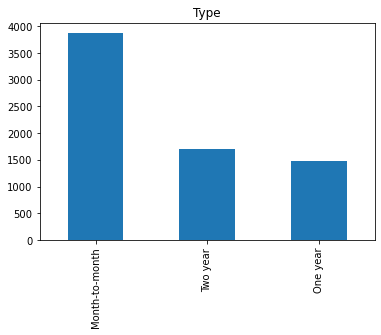

----------------------------------------

PaperlessBilling


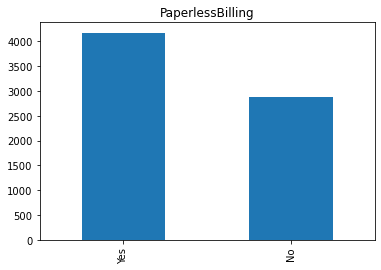

----------------------------------------

PaymentMethod


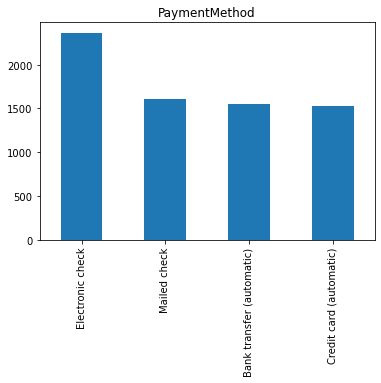

----------------------------------------

gender


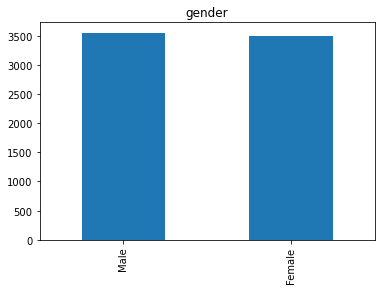

----------------------------------------

SeniorCitizen


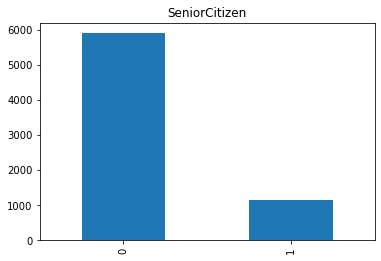

----------------------------------------

Partner


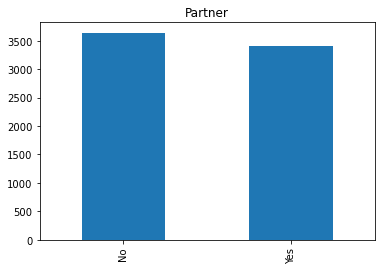

----------------------------------------

Dependents


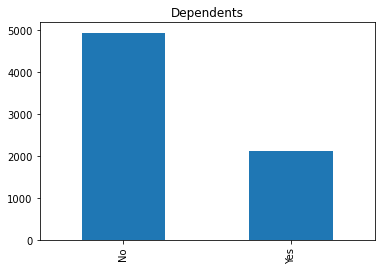

----------------------------------------

InternetService


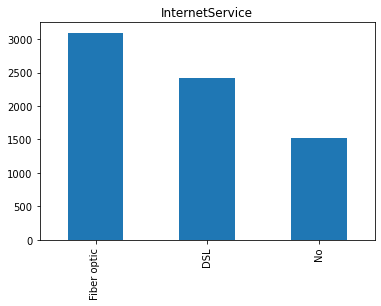

----------------------------------------

OnlineSecurity


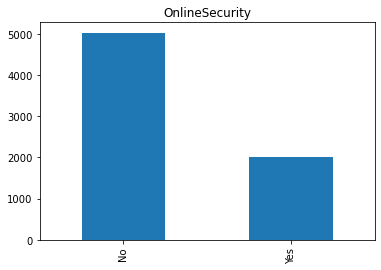

----------------------------------------

OnlineBackup


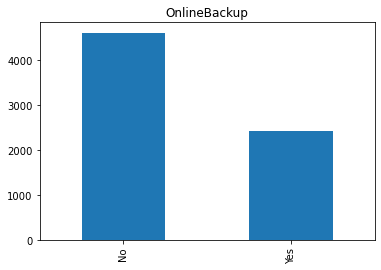

----------------------------------------

DeviceProtection


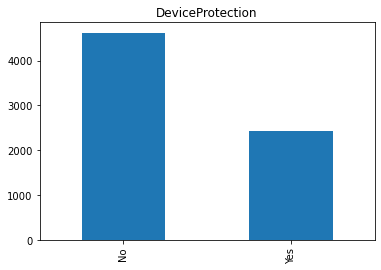

----------------------------------------

TechSupport


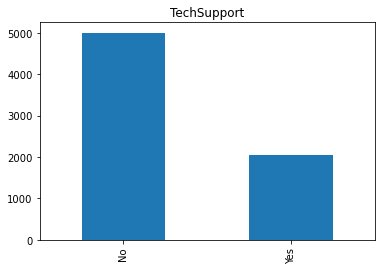

----------------------------------------

StreamingTV


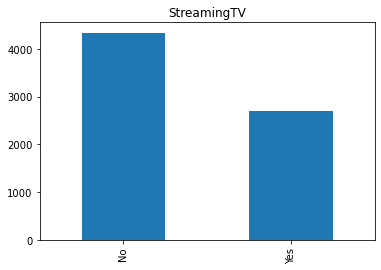

----------------------------------------

StreamingMovies


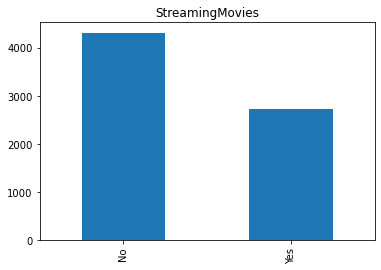

----------------------------------------

MultipleLines


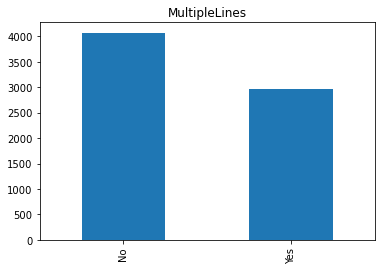

----------------------------------------

Churn


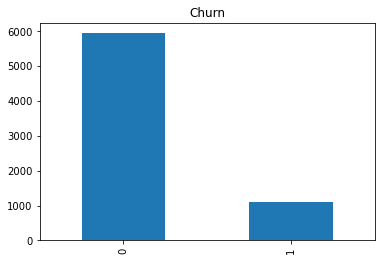

----------------------------------------



In [54]:
columns = ['Type', 'PaperlessBilling',
       'PaymentMethod', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines', 'Churn']

           
for name in columns:
    print(name)
    final_data[name].value_counts().plot(
        kind='bar', 
        title=name
    )
    plt.title(name)
    plt.show()
    print('-' * 40)
    print()


BeginDate


C:\Users\lera\AppData\Local\Temp/ipykernel_16940/2441404854.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(final_data[name].describe())


count                    7043
unique                     77
top       2014-02-01 00:00:00
freq                      366
first     2013-10-01 00:00:00
last      2020-02-01 00:00:00
Name: BeginDate, dtype: object

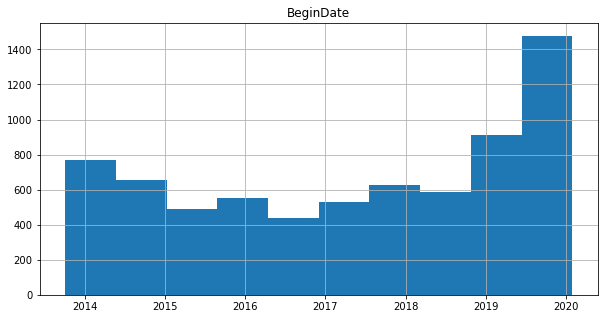

----------------------------------------

EndDate


count                    7043
unique                     67
top       2020-02-01 00:00:00
freq                     5942
first     2014-06-01 00:00:00
last      2020-02-01 00:00:00
Name: EndDate, dtype: object

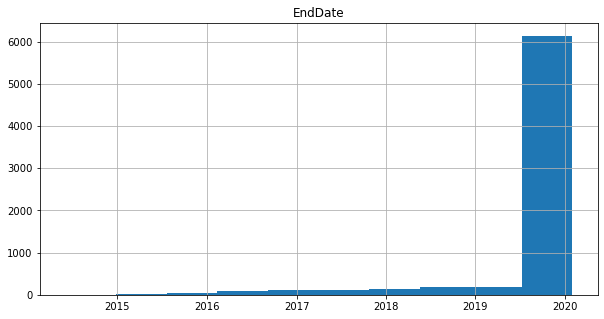

----------------------------------------

MonthlyCharges


count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

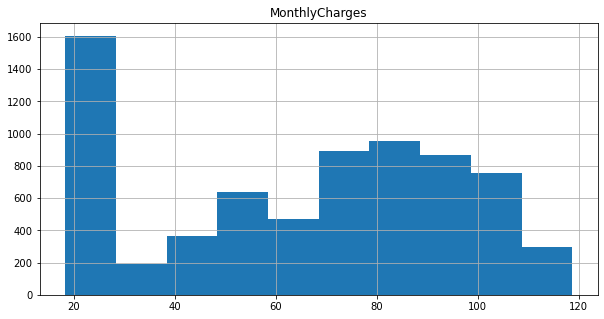

----------------------------------------

TotalCharges


count    7043.000000
mean     2115.312885
std      2112.742814
min         0.000000
25%       436.750000
50%      1343.350000
75%      3236.690000
max      9221.380000
Name: TotalCharges, dtype: float64

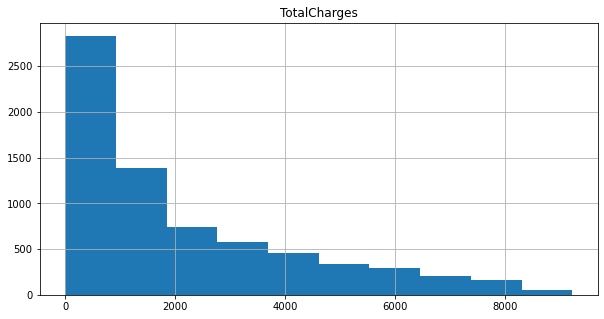

----------------------------------------

days


count    7043.000000
mean      898.555729
std       683.130510
min         0.000000
25%       276.000000
50%       761.000000
75%      1461.000000
max      2314.000000
Name: days, dtype: float64

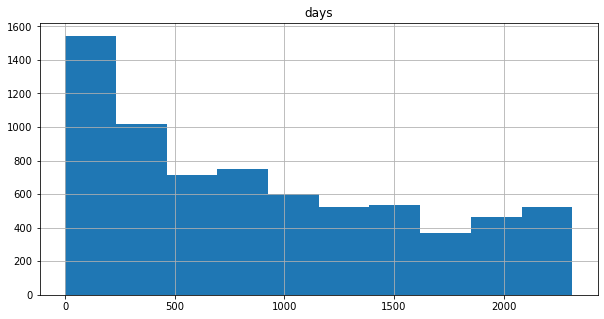

----------------------------------------

mean_charges


count    7.043000e+03
mean     2.115313e+03
std      2.032865e-10
min      2.115313e+03
25%      2.115313e+03
50%      2.115313e+03
75%      2.115313e+03
max      2.115313e+03
Name: mean_charges, dtype: float64

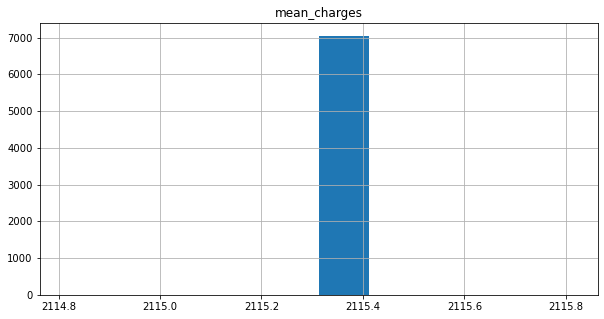

----------------------------------------



In [55]:
columns = ['BeginDate', 'EndDate', 'MonthlyCharges', 'TotalCharges', 'days', 'mean_charges']

for name in columns:
    print(name)
    display(final_data[name].describe())
    final_data.hist(name, grid=True, figsize = (10,5))
    plt.title(name)
    plt.show()
    print('-' * 40)
    print()

Заметила приток новых клиентов в 2022 году. В помесячной оплате максимальная сумма 118. Пик на графике приходится на 85-90. Но в TotalCharges гистограмма идет на спад. Возможно, клиенты меняли тариф на более дешевый, а может и вообще уходили.

Type


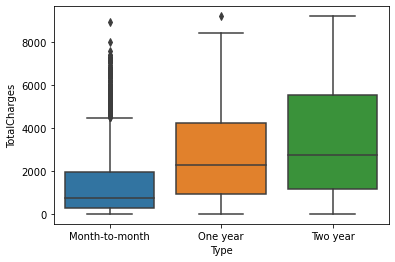

----------------------------------------

PaperlessBilling


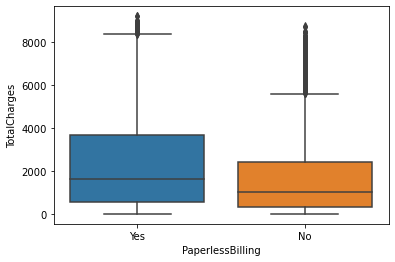

----------------------------------------

PaymentMethod


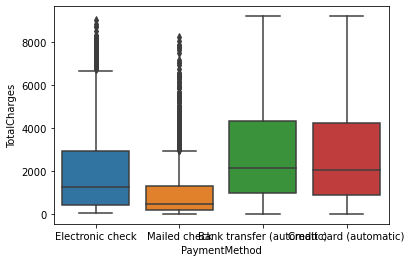

----------------------------------------

gender


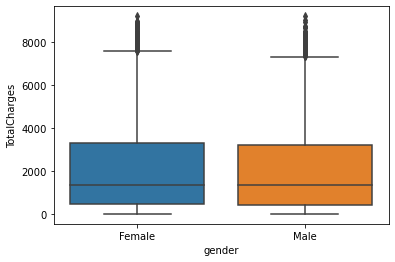

----------------------------------------

SeniorCitizen


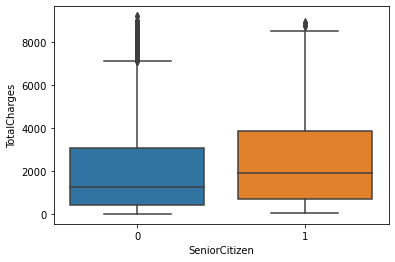

----------------------------------------

Partner


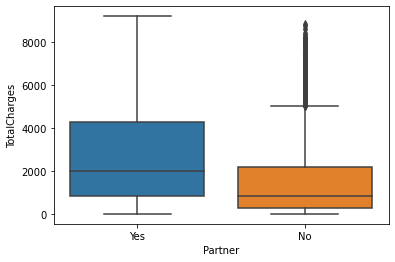

----------------------------------------

Dependents


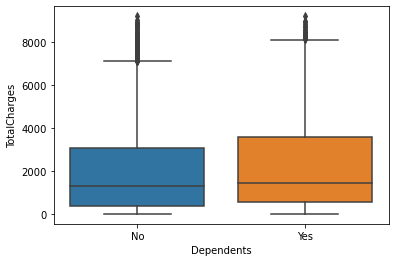

----------------------------------------

InternetService


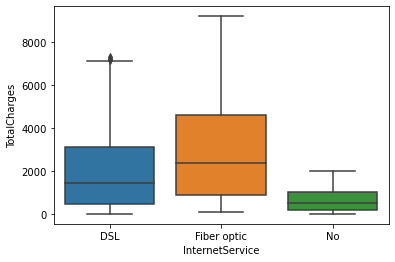

----------------------------------------

OnlineSecurity


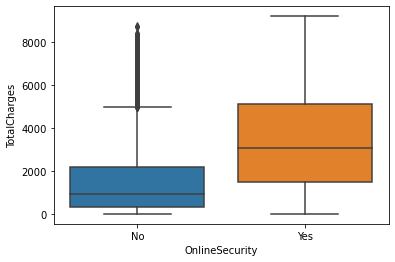

----------------------------------------

OnlineBackup


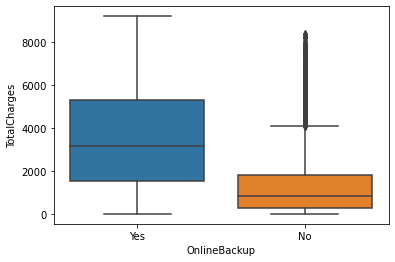

----------------------------------------

DeviceProtection


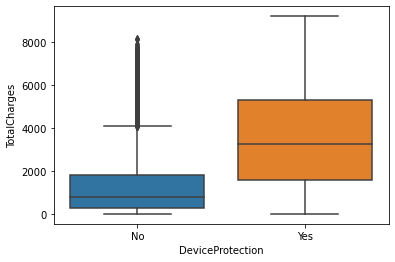

----------------------------------------

TechSupport


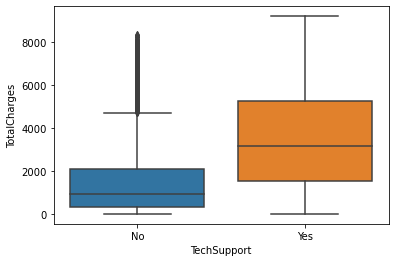

----------------------------------------

StreamingTV


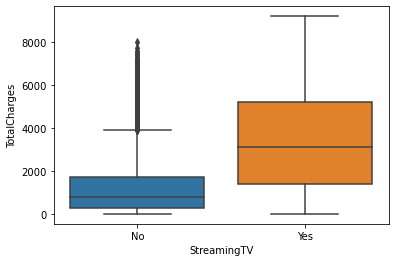

----------------------------------------

StreamingMovies


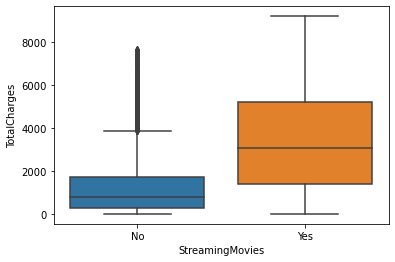

----------------------------------------

MultipleLines


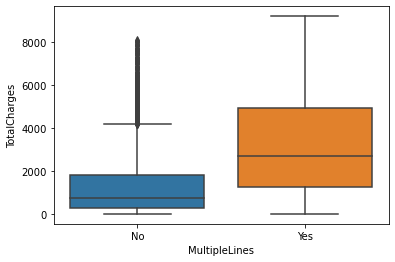

----------------------------------------

Churn


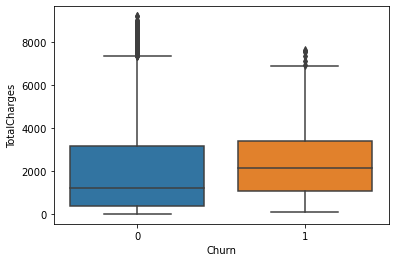

----------------------------------------



In [56]:
columns = ['Type', 'PaperlessBilling',
       'PaymentMethod', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines', 'Churn']



for name in columns:
    print(name)
    sns.boxplot(data=final_data, x=name, y='TotalCharges')
    plt.show()
    print('-' * 40)
    print()

Каких-то явных выбросов я не обнаружила. Если это не так, то поправь меня, пожалуйста. Посмотрю внимательнее.

<b>Общий вывод: </b>

Данные без явных выбросов. Есть приток новых клиентов. В помесячной оплате максимальная сумма 118. Пик на графике приходится на 85-90. Но в TotalCharges гистограмма идет на спад. Возможно, клиенты меняли тариф на более дешевый, а может и вообще уходили.

# 5. Разделим выборки

In [57]:
final_data.columns

Index(['BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'MultipleLines', 'days', 'count_charges', 'mean_charges',
       'charges_per_date', 'mean_total_charges', 'Churn'],
      dtype='object')

In [58]:
target = final_data['Churn'] 
features = final_data.drop(['Churn', 'BeginDate', 'EndDate' ],axis=1)

In [59]:
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.25, random_state=random_state)


In [60]:
features_train

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,days,count_charges,mean_charges,charges_per_date,mean_total_charges
customerID,,,,,,,,,,,,,,,,,,,,,
8617-ENBDS,Month-to-month,Yes,Credit card (automatic),73.60,220.80,Male,0,No,No,Fiber optic,...,Yes,No,No,No,No,92,3.000000,2115.312885,2.4,1.946088e+05
8205-VSLRB,Two year,No,Credit card (automatic),77.30,1688.23,Male,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,640,21.839974,2115.312885,2.637859,1.353800e+06
9419-IPPBE,One year,Yes,Electronic check,90.15,4597.65,Female,0,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,1553,51.000000,2115.312885,2.960496,3.285081e+06
4989-LIXVT,Month-to-month,Yes,Electronic check,95.90,1342.60,Male,1,No,No,Fiber optic,...,Yes,No,No,Yes,Yes,426,14.000000,2115.312885,3.151643,9.011233e+05
7813-TKCVO,One year,No,Mailed check,20.35,407.00,Female,0,Yes,No,No,...,No,No,No,No,No,610,20.000000,2115.312885,0.667213,1.290341e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9839-ETQOE,Month-to-month,Yes,Electronic check,40.45,1861.10,Male,0,No,Yes,DSL,...,Yes,No,No,No,No,1310,46.009889,2115.312885,1.420687,2.771060e+06
7129-ACFOG,Month-to-month,Yes,Electronic check,53.80,279.76,Female,0,No,No,DSL,...,No,No,No,No,Yes,153,5.200000,2115.312885,1.828497,3.236429e+05
7855-DIWPO,Month-to-month,Yes,Electronic check,68.65,1470.48,Female,0,No,No,Fiber optic,...,No,No,No,No,No,641,21.419956,2115.312885,2.294041,1.355916e+06


In [61]:
numeric_columns = ['days', 'MonthlyCharges', 'TotalCharges', 'mean_charges', 'count_charges',
       'charges_per_date', 'mean_total_charges']
categorial_columns = ['Type', 'PaperlessBilling',
       'PaymentMethod', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines']

In [62]:
ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()  

transformer = make_column_transformer(
    (ohe, categorial_columns),
    (scaler, numeric_columns),
    remainder=scaler)

features_train_transformer = transformer.fit_transform(features_train)
features_test_transformer = transformer.transform(features_test)

In [63]:
features_train_ohe = pd.DataFrame(
    features_train_transformer, 
    columns=transformer.get_feature_names_out().tolist()
)

features_test_ohe = pd.DataFrame(
    features_test_transformer, 
    columns=transformer.get_feature_names_out().tolist()
)

In [64]:
features_test_ohe

,onehotencoder__Type_One year,onehotencoder__Type_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_1,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,...,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_Yes,onehotencoder__MultipleLines_Yes,standardscaler__days,standardscaler__MonthlyCharges,standardscaler__TotalCharges,standardscaler__mean_charges,standardscaler__count_charges,standardscaler__charges_per_date,standardscaler__mean_total_charges
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,-0.431071,-1.457950,-0.806924,0.0,-0.452414,-1.459490,-0.431071
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.278125,-1.449640,-0.993731,0.0,-1.277044,-1.464495,-1.278125
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.892823,0.953677,2.187323,0.0,1.804468,0.872818,1.892823
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,-0.918457,0.892182,-0.573629,0.0,-0.890770,1.082349,-0.918457
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,-0.918457,1.154785,-0.578933,0.0,-0.929831,1.042782,-0.918457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.018147,-0.296181,-0.210213,0.0,-0.018398,-0.338399,0.018147
1757,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.806209,0.278887,1.423315,0.0,1.717665,0.217987,1.806209
1758,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,-1.188575,0.868913,-0.874365,0.0,-1.190241,0.768362,-1.188575
1759,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,-1.008007,0.170854,-0.764842,0.0,-1.007518,0.161453,-1.008007


In [65]:
print('\n','Размер датасета',final_data.shape,
      '\n', 'Признаки тренеровочной выборки',features_train_ohe.shape,
      '\n','Таргет тренировочной выборки', target_train.shape,
      '\n', 'Признаки тестовой выборки', features_test_ohe.shape,
      '\n','Таргет тестовой выборки',  target_test.shape)


 Размер датасета (7043, 25) 
 Признаки тренеровочной выборки (5282, 26) 
 Таргет тренировочной выборки (5282,) 
 Признаки тестовой выборки (1761, 26) 
 Таргет тестовой выборки (1761,)


# 6. Обучение моделий

## CatBoost

In [66]:
params_cat = {'learning_rate': [0.03, 0.1, 0.5],
        'depth': [4, 6, 10, 20],
        'iterations': [10, 50],
        'l2_leaf_reg': [1, 7]
       }

model = CatBoostClassifier(random_state=random_state)

In [67]:
%%time
catboost_gs = GridSearchCV(model, params_cat, cv=5, scoring=['roc_auc', 'f1'], refit='roc_auc')
catboost_gs.fit(features_train_ohe, target_train)

0:	learn: 0.6702131	total: 158ms	remaining: 1.43s
1:	learn: 0.6492959	total: 162ms	remaining: 647ms
2:	learn: 0.6294517	total: 165ms	remaining: 384ms
3:	learn: 0.6120429	total: 168ms	remaining: 252ms
4:	learn: 0.5943101	total: 171ms	remaining: 171ms
5:	learn: 0.5775083	total: 174ms	remaining: 116ms
6:	learn: 0.5613675	total: 177ms	remaining: 75.8ms
7:	learn: 0.5495451	total: 179ms	remaining: 44.9ms
8:	learn: 0.5364607	total: 182ms	remaining: 20.3ms
9:	learn: 0.5252313	total: 185ms	remaining: 0us
0:	learn: 0.6713585	total: 2.93ms	remaining: 26.3ms
1:	learn: 0.6489209	total: 5.71ms	remaining: 22.8ms
2:	learn: 0.6277998	total: 8.59ms	remaining: 20.1ms
3:	learn: 0.6072250	total: 11.6ms	remaining: 17.4ms
4:	learn: 0.5896866	total: 14.4ms	remaining: 14.4ms
5:	learn: 0.5755967	total: 17ms	remaining: 11.4ms
6:	learn: 0.5611690	total: 19.8ms	remaining: 8.48ms
7:	learn: 0.5448217	total: 22.7ms	remaining: 5.67ms
8:	learn: 0.5330050	total: 25.6ms	remaining: 2.85ms
9:	learn: 0.5222841	total: 28.4ms

C:\Users\lera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lera\anaconda3\lib\site-packages\catboost\core.py", line 5131, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\lera\anaconda3\lib\site-packages\catboost\core.py", line 2341, in _

0:	learn: 0.4483911	total: 3.67ms	remaining: 180ms
1:	learn: 0.3774557	total: 7.55ms	remaining: 181ms
2:	learn: 0.3457974	total: 11.2ms	remaining: 176ms
3:	learn: 0.3363737	total: 14.9ms	remaining: 172ms
4:	learn: 0.3287511	total: 17.8ms	remaining: 160ms
5:	learn: 0.3259620	total: 21ms	remaining: 154ms
6:	learn: 0.3244302	total: 24.1ms	remaining: 148ms
7:	learn: 0.3220141	total: 27.2ms	remaining: 143ms
8:	learn: 0.3197674	total: 30.4ms	remaining: 138ms
9:	learn: 0.3168387	total: 33.1ms	remaining: 132ms
10:	learn: 0.3153808	total: 36.4ms	remaining: 129ms
11:	learn: 0.3141131	total: 39.5ms	remaining: 125ms
12:	learn: 0.3110173	total: 42.7ms	remaining: 121ms
13:	learn: 0.3093884	total: 45.8ms	remaining: 118ms
14:	learn: 0.3080479	total: 48.9ms	remaining: 114ms
15:	learn: 0.3048497	total: 52.1ms	remaining: 111ms
16:	learn: 0.3044961	total: 55.3ms	remaining: 107ms
17:	learn: 0.3022036	total: 58.4ms	remaining: 104ms
18:	learn: 0.3005483	total: 61.6ms	remaining: 100ms
19:	learn: 0.2961581	tot

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000013A4B67DD60>,
             param_grid={'depth': [4, 6, 10, 20], 'iterations': [10, 50],
                         'l2_leaf_reg': [1, 7],
                         'learning_rate': [0.03, 0.1, 0.5]},
             refit='roc_auc', scoring=['roc_auc', 'f1'])

In [68]:
print(catboost_gs.best_params_)
print(catboost_gs.best_score_)

{'depth': 4, 'iterations': 50, 'l2_leaf_reg': 1, 'learning_rate': 0.5}
0.8654474894953674


## Рандомный лес

In [69]:
params_rf = {"n_estimators" : [10, 50, 100, 200], 
          "criterion" : ['gini', 'entropy', 'log_loss'], 
          'max_features': ['auto', 'sqrt', 'log2'],
          'max_depth' : [1,10,30,50,100]
         }

model = RandomForestClassifier(random_state=random_state)

In [70]:
%%time
gs_rf = GridSearchCV(model, params_rf, cv=5, scoring=['roc_auc', 'f1'], refit='roc_auc')
gs_rf.fit(features_train_ohe, target_train)

C:\Users\lera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lera\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\lera\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\lera\anaconda3\lib\site-packages\sk

Wall time: 9min 3s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=310723),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 10, 30, 50, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 200]},
             refit='roc_auc', scoring=['roc_auc', 'f1'])

In [71]:
print(gs_rf.best_params_)
print(gs_rf.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
0.834500751044439


## Lightgbm

In [72]:
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'objective' : ['binary'],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

mdl = lgb.LGBMClassifier(random_state=random_state)

In [73]:
%%time
grid = GridSearchCV(mdl, gridParams, cv=5, n_jobs=-1, scoring=['roc_auc', 'f1'], refit='roc_auc')
grid.fit(features_train_ohe, target_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 825, number of negative: 4457
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1428
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.156191 -> initscore=-1.686848
[LightGBM] [Info] Start training from score -1.686848
Wall time: 21.2 s


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=310723), n_jobs=-1,
             param_grid={'colsample_bytree': [0.64, 0.65, 0.66],
                         'learning_rate': [0.005, 0.01],
                         'n_estimators': [8, 16, 24], 'objective': ['binary'],
                         'reg_alpha': [1, 1.2], 'reg_lambda': [1, 1.2, 1.4],
                         'subsample': [0.7, 0.75]},
             refit='roc_auc', scoring=['roc_auc', 'f1'])

In [74]:
print(grid.best_params_)
print(grid.best_score_)

{'colsample_bytree': 0.64, 'learning_rate': 0.01, 'n_estimators': 24, 'objective': 'binary', 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.7}
0.8152882564833919


# 7. Выбор модели, важность признаков, матрица ошибок

## Выбор модели

In [88]:
result_test = []
result_test.append(["Catboost", catboost_gs.best_score_, "58 s"])
result_test.append(["Lightgbm", grid.best_score_, "21.2 s"])
result_test.append(["RF", gs_rf.best_score_, "9min 3s"])
result_test= pd.DataFrame(result_test, columns=["Model","roc_auc_test", "time"])
result_test = result_test.set_index('Model')

In [89]:
result_test

,roc_auc_test,time
Model,,
Catboost,0.865447,58 s
Lightgbm,0.815288,21.2 s
RF,0.834501,9min 3s


По значениям метрики roc_auc и времени победила catboost

In [90]:
predicted_probalities = catboost_gs.best_estimator_.predict_proba(features_test_ohe)[:, 1]
print('ROC-AUC score', roc_auc_score(target_test, predicted_probalities))

ROC-AUC score 0.8887217586492948


<Figure size 432x288 with 0 Axes>

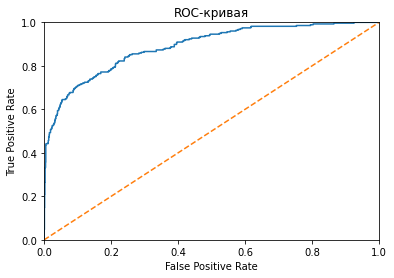

In [91]:
plt.figure()

fpr, tpr, thresholds = roc_curve(target_test, predicted_probalities) 

plt.figure()
plt.plot(fpr, tpr)


plt.plot([0, 1], [0, 1], linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])



plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.title('ROC-кривая')
plt.show()

## Важность признаков

In [92]:
feature_importances = catboost_gs.best_estimator_.feature_importances_

In [93]:
feature_importances

array([ 1.52111196,  4.95078464,  1.02248387,  0.58144207,  0.24189767,
        2.2746832 ,  0.        ,  0.62077361,  2.38864839,  0.74934858,
        0.        ,  0.        ,  0.90106925,  2.32371495,  0.6612432 ,
        0.48051762,  0.45664094,  0.72167275,  2.90967039, 21.31805243,
        2.77394677,  2.78804419,  0.        , 20.4143838 ,  6.69087106,
       23.20899866])

In [94]:
data_importances = pd.DataFrame(feature_importances, index = features_test_ohe.columns, columns=['importance'])

In [95]:
data_importances = data_importances.sort_values(by='importance', ascending=False)
data_importances

,importance
standardscaler__mean_total_charges,23.208999
standardscaler__days,21.318052
standardscaler__count_charges,20.414384
standardscaler__charges_per_date,6.690871
onehotencoder__Type_Two year,4.950785
onehotencoder__MultipleLines_Yes,2.909670
standardscaler__TotalCharges,2.788044
standardscaler__MonthlyCharges,2.773947
onehotencoder__Partner_Yes,2.388648
onehotencoder__OnlineBackup_Yes,2.323715


## Матрица ошибок

In [96]:
predicted = catboost_gs.best_estimator_.predict(features_test_ohe)

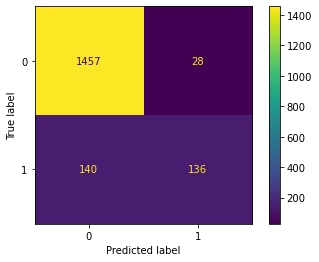

In [97]:
cm = confusion_matrix(target_test, predicted, labels=catboost_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost_gs.classes_)
disp.plot()
plt.show()

In [98]:
print(classification_report(target_test, predicted))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1485
           1       0.83      0.49      0.62       276

    accuracy                           0.90      1761
   macro avg       0.87      0.74      0.78      1761
weighted avg       0.90      0.90      0.89      1761



In [99]:
result_matrix = []
result_matrix.append(["Корректное срабатывание алгоритма", "True Positive (TP)", "Отточного клиента алгоритм назвал Отточным", "1457"])
result_matrix.append(["Ложное срабатывание алгоритма", "False Positive (FP)", "Неотточного клиента алгоритм назвал отточным", "28"])
result_matrix.append(["Корректный пропуск алгоритма", "True Negative (TN)", "Неотточного клиента алгоритм назвал Неотточным", "136"])
result_matrix.append(["Ложный пропуск алгоритма", "False Negative (FN)", "Отточного клиента алгоритм назвал не отточным", "140"])
result= pd.DataFrame(result_matrix, columns=["Результат","Условное обозначение", "Объяснение в контексте задачи", "Количество клиентов"])
result = result.set_index('Результат')

In [100]:
#интерпритации матрицы ошибок
result

,Условное обозначение,Объяснение в контексте задачи,Количество клиентов
Результат,,,
Корректное срабатывание алгоритма,True Positive (TP),Отточного клиента алгоритм назвал Отточным,1457
Ложное срабатывание алгоритма,False Positive (FP),Неотточного клиента алгоритм назвал отточным,28
Корректный пропуск алгоритма,True Negative (TN),Неотточного клиента алгоритм назвал Неотточным,136
Ложный пропуск алгоритма,False Negative (FN),Отточного клиента алгоритм назвал не отточным,140


# 8. Общий вывод

<br><b>Провела работу над датасетом.</b>
<br>    В contract_new,personal_new, internet_new, phone_new нету пропущенных значений и дубликатов. Тип данных TotalCharges, BeginDate, EndDate почему-то object, заменила на float и datetime соответственно. В EndDate есть значение "No". Между вариантами дропнуть или заменить на другое значение - выбрала заменить на "2020-02-01". В типе оплаты больше людей, которые оплачивают по-месячно. Тип платежа - Electronic check. По гендеру чуть больше мужчин. Чуть больше половины не состоят в браке. Детей нет у преобладающего большинства.Топ тип подключения — Fiber optic. У большинства нету блокировки опасных сайтов, облачного хранилище файлов для резервного копирования данных, антивируса, выделенной линии технической поддержки. У большинства нету подключения телефона к нескольким линиям одновременно. В последних двух датасетах всего 5517 строк, что меньше, чем в предыдущих двух. Значит, тут не все клиенты.

<br><b>Сделала объединение датасетов.</b>
<br>    Пустые значения заменила на "No", так как все они были категориальными признаками. Данные без явных выбросов. Аномалий не обнаружила. Есть приток новых клиентов. В помесячной оплате максимальная сумма 118. Пик на графике приходится на 85-90. Но в TotalCharges гистограмма идет на спад. Возможно, клиенты меняли тариф на более дешевый, а может и вообще уходили.

<br><b>Подготовка и обучение моделей.</b>
    <br>Сделала one hot encoding категориальных признаков. Обучила и подобрала параметры для трех моделей: catboost, random forest, lightgbm.
Лучшей моделю оказалась catboost. roc auc на тесте - 0.88.

# Отчёт по решению

<b>Какие пункты плана были выполнены, а какие — нет. Почему?</b>

План работы:
1. Объединить все датасеты ✅
2. Предобработка данных ✅
3. Разделить выборки ✅
4. Моделирование (подбор гиперпараметров, выбор лучшей модели, проверка на тесте) ✅
5. Анализ лучше модели ✅


<b>Какие трудности возникли и как вы их преодолели?</b>
Проблема с датасетами:
Тип данных TotalCharges, BeginDate, EndDate - object, заменила на float и datetime соответственно. В EndDate есть значение "No". Заменила на "2020-02-01". В двух датасетах всего 5517 строк, что меньше, чем в предыдущих двух. Не все данные о клиентах.

Из моих личных проблем: долго разбиралась с one hot encoding, но вроде получилось.


<b>Какие ключевые шаги в решении задачи вы выделили?</b>
1. Подготовка данных (предобработка, пропуски, аномалии)
2. Объединение датафреймов
3. Разделение выборки
4. Кодирование с one hot encoding
5. Подбор гиперпараметров, лучшая метрика на кросс-валидации, выбор лучшей модели
6. Тестирование лучшей модели,  матрица ошибок
7. Исследование важности признаков


<b>Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена?</b>

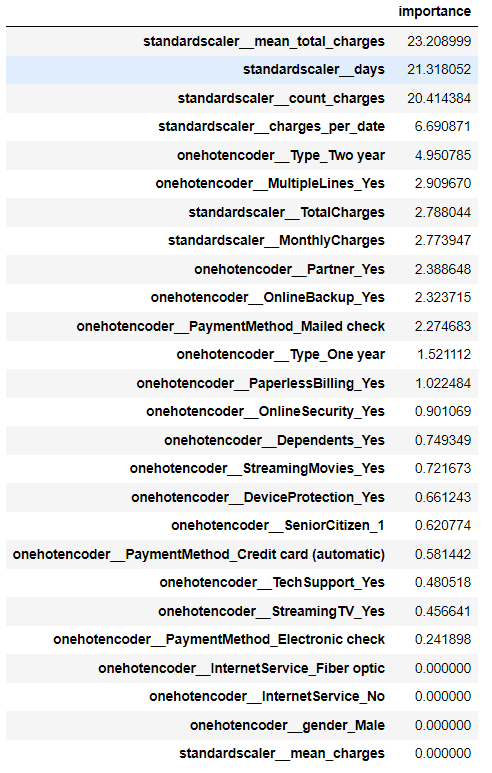

Признаки сделанные самостоятельно:
<br><code>days</code> - количество дней от даты заключения договора до ухода
<br><code>mean_charges</code> - среднее от общих расходов абонента
<br><code>count_charges</code> - количество проводимых оплат 
<br><code>charges_per_date</code> - сумма расходов за 1 день
<br><code>mean_total_charges</code> - среднее от общих расходов абонента на количество дней.



<b>Какая ваша итоговая модель, какие у неё гиперпараметы и какое качество?</b>
<br>Catboost. Качество на тренировочной - 0.86. Качество на тесте - 0.89. 
<br>Гиперпараметры: <code>{'depth': 4, 'iterations': 50, 'l2_leaf_reg': 1, 'learning_rate': 0.5}</code>